# SIR Model of Infectious Diseases

> An introduction to compartmental models in epidemiology and how to simulate disease dynamics in a population. 
- toc: true
- comments: true
- use_plotly: true

# Background

Epidemiological models are a type of compartmental model describing disease dynamics on a population. In the case of infectious diseases, we model how the virus/disease interacts with each compartment of the system. Each *compartment* in this model is represented as a homogeneous system - or an individual within a population where each individual is equivalent. Different epidemiological models consider different compartments with the most common being the SIR model. The compartments in this model are categorized within the population as:
- **(S)**usceptible
- **(I)**nfected
- **(R)**ecovered 


# SIR Model

In [ ]:
# Epidemiological modeling is important to assess how infectious diseases may spread within a population. These models take into account several disease characteristics such as transmission rate, recovery rate, and mortality rate. These parameters can describe the effect of the disease on the population with respect to susceptible, infectious, and recovered individuals. More complex models take into additional traits such as infected detected, infected undetected, extinct, and vaccinated individuals, also known as the SIDAREV model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# transmission rate (1/days)
beta = 0.00035

# recovery rate (1/days)
gamma = 0.1

# Population
N = 500 

# Number of days to simulate (starting at t=0)
days = 3 + 1

# Initial number of infected and recovered
I, R = np.zeros(days), np.zeros(days)
I[0], R[0] = 1, 0


# Initial number of susceptible
S = np.zeros(days)
S[0] = N - I[0] - R[0]

for t in range(days-1):
    R[t+1] = R[t] + gamma * I[t]
    I[t+1] = I[t] - gamma * I[t] + beta * I[t] * S[t]
    S[t+1] = N - I[t+1] - R[t+1]

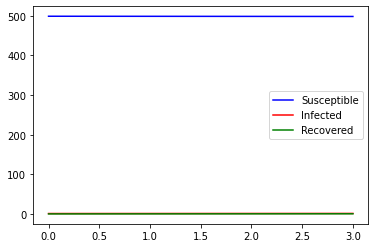

In [3]:
fig,ax = plt.subplots()
ax.plot(S, 'b', label='Susceptible')
ax.plot(I, 'r', label='Infected')
ax.plot(R, 'g', label='Recovered')
ax.legend();
fig.show()

In [4]:
S, I, R

(array([499.        , 498.82535   , 498.63772807, 498.43618746]),
 array([1.        , 1.07465   , 1.15480693, 1.24086685]),
 array([0.        , 0.1       , 0.207465  , 0.32294569]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# transmission rate (1/days)
beta = 0.00035

# recovery rate (1/days)
gamma = 0.1

# Population
N = 500 

# Number of days to simulate (starting at t=0)
days = 3 + 1

# Initial number of infected and recovered
I, R = np.zeros(days), np.zeros(days)
I[0], R[0] = 1, 0


# Initial number of susceptible
S = np.zeros(days)
S[0] = N - I[0] - R[0]

for t in range(days-1):
    R[t+1] = R[t] + gamma * I[t]
    I[t+1] = I[t] - gamma * I[t] + beta * I[t] * S[t]
    S[t+1] = N - I[t+1] - R[t+1]

fig,ax = plt.subplots()
ax.plot(S, 'b', label='Susceptible')
ax.plot(I, 'r', label='Infected')
ax.plot(R, 'g', label='Recovered')
ax.legend();
fig.show()

S, I, R